In this part we will generate the data and the analysis connected to figure 1:
- the force directed network
- the network with sets of attituteds
- the conditional probability 
- the hierarchical clustering

# Import the packages to use

In [33]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib

# import usefulFunctions as uf
# importlib.reload(uf)

from wgm2018_pack import *

import winsound 
import scipy.stats as stt

from sklearn.linear_model import LinearRegression

from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy as sch
import random

# Note: if you moved the package WGM_pack, make sure to uncomment the following lines and insert the path of where you placed it
# import sys
# sys.path.insert(0, 'C:/your/path/to/the/package') # make sure to use / and not \


# List of attitudes

Here we set some lists that we will use later.

In [2]:
list_science_related_attitudes2 = ['Trust neighborhood:A lot',
 'Trust neighborhood:Some',
 'Trust neighborhood:Not much',
 'Trust neighborhood:Not at all',
 'Trust government:A lot',
 'Trust government:Some',
 'Trust government:Not much',
 'Trust government:Not at all',
 'Trust Scientists:A lot',
 'Trust Scientists:Some',
 'Trust Scientists:Not much',
 'Trust Scientists:Not at all',
 'Trust Journalists:A lot',
 'Trust Journalists:Some',
 'Trust Journalists:Not much',
 'Trust Journalists:Not at all',
 'Trust Doctors:A lot',
 'Trust Doctors:Some',
 'Trust Doctors:Not much',
 'Trust Doctors:Not at all',
 'Trust NGO workers:A lot',
 'Trust NGO workers:Some',
 'Trust NGO workers:Not much',
 'Trust NGO workers:Not at all',
 'Trust science:A lot',
 'Trust science:Some',
 'Trust science:Not much',
 'Trust science:Not at all',
 'Trust Scientists 4 info:A lot',
 'Trust Scientists 4 info:Some',
 'Trust Scientists 4 info:Not much',
 'Trust Scientists 4 info:Not at all',
 'Trust scientist intentions:A lot',
 'Trust scientist intentions:Some',
 'Trust scientist intentions:Not much',
 'Trust scientist intentions:Not at all',
 'Trust scientists honesty:A lot',
 'Trust scientists honesty:Some',
 'Trust scientists honesty:Not much',
 'Trust scientists honesty:Not at all',
 'Trust scientist in Med Comp intentions:A lot',
 'Trust scientist in Med Comp intentions:Some',
 'Trust scientist in Med Comp intentions:Not much',
 'Trust scientist in Med Comp intentions:Not at all',
 'Trust scientists in Med Comp honesty:A lot',
 'Trust scientists in Med Comp honesty:Some',
 'Trust scientists in Med Comp honesty:Not much',
 'Trust scientists in Med Comp honesty:Not at all',
 'Trust gov 4 Med Advice:A lot',
 'Trust gov 4 Med Advice:Some',
 'Trust gov 4 Med Advice:Not much',
 'Trust gov 4 Med Advice:Not at all',
 'Trust Doc 4 med advice:A lot',
 'Trust Doc 4 med advice:Some',
 'Trust Doc 4 med advice:Not much',
 'Trust Doc 4 med advice:Not at all',
 'Vaccines important to children:Strongly agree',
 'Vaccines important to children:Somewhat agree',
 'Vaccines important to children:Neither agree nor disagree',
 'Vaccines important to children:Somewhat disagree',
 'Vaccines important to children:Strongly disagree',
 'Vaccines Safe:Strongly agree',
 'Vaccines Safe:Somewhat agree',
 'Vaccines Safe:Neither agree nor disagree',
 'Vaccines Safe:Somewhat disagree',
 'Vaccines Safe:Strongly disagree',
 'Vaccines Effective:Strongly agree',
 'Vaccines Effective:Somewhat agree',
 'Vaccines Effective:Neither agree nor disagree',
 'Vaccines Effective:Somewhat disagree',
 'Vaccines Effective:Strongly disagree']

In [3]:
# Attitudes on vaccines
vacc_neut_att = ['Vaccines important to children:Neither agree nor disagree', 'Vaccines Safe:Neither agree nor disagree', 'Vaccines Effective:Neither agree nor disagree']

vacc_pos_att = ['Vaccines important to children:Strongly agree',
 'Vaccines important to children:Somewhat agree','Vaccines Safe:Strongly agree',
 'Vaccines Safe:Somewhat agree','Vaccines Effective:Strongly agree',
 'Vaccines Effective:Somewhat agree']
vacc_Wpos_att = ['Vaccines important to children:Somewhat agree',
                 'Vaccines Safe:Somewhat agree', 'Vaccines Effective:Somewhat agree']
vacc_Spos_att = ['Vaccines important to children:Strongly agree',
                 'Vaccines Safe:Strongly agree', 'Vaccines Effective:Strongly agree']

    
vacc_neg_att = ['Vaccines important to children:Somewhat disagree',
 'Vaccines important to children:Strongly disagree','Vaccines Safe:Somewhat disagree',
 'Vaccines Safe:Strongly disagree','Vaccines Effective:Somewhat disagree',
 'Vaccines Effective:Strongly disagree']
vacc_Wneg_att = ['Vaccines important to children:Somewhat disagree',
                 'Vaccines Safe:Somewhat disagree','Vaccines Effective:Somewhat disagree']
vacc_Sneg_att = ['Vaccines important to children:Strongly disagree',
                 'Vaccines Safe:Strongly disagree','Vaccines Effective:Strongly disagree']

vacc_att_full = ['Vaccines important to children:Strongly agree',
        'Vaccines Safe:Strongly agree',
           'Vaccines Effective:Strongly agree',
           
           'Vaccines important to children:Somewhat agree',
           'Vaccines Safe:Somewhat agree',
           'Vaccines Effective:Somewhat agree',
 
 'Vaccines important to children:Neither agree nor disagree',
           'Vaccines Safe:Neither agree nor disagree',
           'Vaccines Effective:Neither agree nor disagree',
           
 'Vaccines important to children:Somewhat disagree',
 'Vaccines Effective:Somewhat disagree',
 'Vaccines Safe:Somewhat disagree',
           
 'Vaccines Safe:Strongly disagree',
           'Vaccines important to children:Strongly disagree',
 'Vaccines Effective:Strongly disagree',]

In [4]:
# Attitudes Don't know
dk_att = [
'Know Science:(DK)',
'Understand meaning Sci:(DK)',
'Study disease is science:(DK)',
'Poetry is science:(DK)',
'Learned Sci in Prim.School:(DK)',
'Learned Sci in Sec.School:(DK)',
'Learned Sci in College/Uni:(DK)',
'Searched Sci past 30d:(DK)',
'Searched Med past 30d:(DK)',
'Searched Sci:(DK)',
'Searched Med:(DK)',
'Confidence NGO:(DK)',
'Confidence Hospitals:(DK)',
'Trust neighborhood:(DK)',
'Trust government:(DK)',
'Trust Scientists:(DK)',
'Trust Journalists:(DK)',
'Trust Doctors:(DK)',
'Trust NGO workers:(DK)',
'Trust traditional Healers:(DK)',
'Trust science:(DK)',
'Trust Scientists 4 info:(DK)',
'Trust scientist intentions:(DK)',
'Trust scientists honesty:(DK)',
'Trust scientist in Med Comp intentions:(DK)',
'Trust scientists in Med Comp honesty:(DK)',
'Science benefits:(DK)',
'Science benefits you:(DK)',
'Science improve next gen:(DK)',
'Science will increase jobs:(DK)',
'Who trust most for Med Advice:(DK)',
'Trust gov 4 Med Advice:(DK)',
'Trust Doc 4 med advice:(DK)',
'Ever heard of vaccines:(DK)',
'Vaccines important to children:(DK)/(Refused)',
'Vaccines Safe:(DK)/(Refused)',
'Vaccines Effective:(DK)/(Refused)',
'Have Children:(DK)',
'Your Child Received Vax:(DK)',
'Religion:(DK)/(Refused)',
'Science disagreed w your religion:(DK)',
'(disagreement)Believe science or religion:(DK)',
]

In [5]:
# Fully positive
full_trust_att = [
'Trust neighborhood:A lot',
'Trust government:A lot',
'Trust Scientists:A lot',
'Trust Journalists:A lot',
'Trust Doctors:A lot',
'Trust NGO workers:A lot',
'Trust science:A lot',
'Trust Scientists 4 info:A lot',
'Trust scientist intentions:A lot',
'Trust scientists honesty:A lot',
'Trust scientist in Med Comp intentions:A lot',
'Trust scientists in Med Comp honesty:A lot',
'Trust gov 4 Med Advice:A lot',
'Trust Doc 4 med advice:A lot',
'Confidence Hospitals:Yes',
'Science benefits you:Yes',
'Science improve next gen:Yes',
]

In [6]:
# Weakly positive
medium_trus_att = [
'Trust neighborhood:Some',
'Trust government:Some',
'Trust Scientists:Some',
'Trust Journalists:Some',
'Trust Doctors:Some',
'Trust NGO workers:Some',
'Trust traditional Healers:Some',
'Trust science:Some',
'Trust Scientists 4 info:Some',
'Trust scientist intentions:Some',
'Trust scientists honesty:Some',
'Trust scientist in Med Comp intentions:Some',
'Trust scientists in Med Comp honesty:Some',
'Science benefits:Some',
'Trust gov 4 Med Advice:Some',
'Trust Doc 4 med advice:Some'
]


In [7]:
# weakly negative
medium_distrust_att = [
'Trust neighborhood:Not much',
'Trust government:Not much',
'Trust Scientists:Not much',
'Trust Journalists:Not much',
'Trust Doctors:Not much',
'Trust NGO workers:Not much',
'Trust traditional Healers:Not much',
'Trust science:Not much',
'Trust Scientists 4 info:Not much',
'Trust scientist intentions:Not much',
'Trust scientists honesty:Not much',
'Trust scientist in Med Comp intentions:Not much',
'Trust scientists in Med Comp honesty:Not much',
'Trust gov 4 Med Advice:Not much',
'Trust Doc 4 med advice:Not much',
]


In [8]:
# Totally negative
full_distrust_att = [
'Trust neighborhood:Not at all',
'Trust government:Not at all',
'Trust Scientists:Not at all',
'Trust Journalists:Not at all',
'Trust Doctors:Not at all',
'Trust NGO workers:Not at all',
'Trust traditional Healers:Not at all',
'Trust science:Not at all',
'Trust Scientists 4 info:Not at all',
'Trust scientist intentions:Not at all',
'Trust scientists honesty:Not at all',
'Trust scientist in Med Comp intentions:Not at all',
'Trust scientists in Med Comp honesty:Not at all',
'Trust gov 4 Med Advice:Not at all',
'Trust Doc 4 med advice:Not at all',
]


In [9]:
religion_att = ['Religion:Named a specific religion']

In [10]:
# Refused attitudes
refused_att = [
'Know Science:(Refused)',
'Understand meaning Sci:(Refused)',
'Study disease is science:(Refused)',
'Poetry is science:(Refused)',
'Learned Sci in Prim.School:(Refused)',
'Learned Sci in Sec.School:(Refused)',
'Learned Sci in College/Uni:(Refused)',
'Searched Sci past 30d:(Refused)',
'Searched Med past 30d:(Refused)',
'Searched Sci:(Refused)',
'Searched Med:(Refused)',
'Confidence NGO:(Refused)',
'Confidence Hospitals:(Refused)',
'Trust neighborhood:(Refused)',
'Trust government:(Refused)',
'Trust Scientists:(Refused)',
'Trust Journalists:(Refused)',
'Trust Doctors:(Refused)',
'Trust NGO workers:(Refused)',
'Trust traditional Healers:(Refused)',
'Trust science:(Refused)',
'Trust Scientists 4 info:(Refused)',
'Trust scientist intentions:(Refused)',
'Trust scientists honesty:(Refused)',
'Trust scientist in Med Comp intentions:(Refused)',
'Trust scientists in Med Comp honesty:(Refused)',
'Science benefits:(Refused)',
'Science benefits you:(Refused)',
'Science improve next gen:(Refused)',
'Science will increase jobs:(Refused)',
'Who trust most for Med Advice:(Refused)',
'Trust gov 4 Med Advice:(Refused)',
'Trust Doc 4 med advice:(Refused)',
'Ever heard of vaccines:(Refused)',
'Vaccines important to children:(DK)/(Refused)',
'Vaccines Safe:(DK)/(Refused)',
'Vaccines Effective:(DK)/(Refused)',
'Have Children:(Refused)',
'Your Child Received Vax:(Refused)',
'Religion:(DK)/(Refused)',
'Science disagreed w your religion:(Refused)',
'(disagreement)Believe science or religion:(Refused)',
]

Aggregated lists (i.e. each item is the name of a list)

In [11]:
list_aggr_vacc = ["vacc_neut_att", "vacc_Wpos_att", "vacc_Spos_att", "vacc_Wneg_att", "vacc_Sneg_att"]
list_aggr_trust = ["full_trust_att", "medium_trus_att", "medium_distrust_att", "full_distrust_att"]
list_aggr_ref = ["refused_att", "dk_att"]
list_aggr_relig = ["religion_att"]

# Functions

In [12]:
# Calculates the correlation bootstrapping the data
def bootstrap_corr(x,y,N,f):
    l = len(x)
    c_vec = []
    
    for i in range(0,N):
        r = np.floor(np.random.rand(N)*l).astype(int)
        xi = x[r]
        yi = y[r]
#         xi = x
#         yi = y
        
        ct = f(xi,yi)
        
        c_vec.append(ct)
        
    c_vec = np.array(c_vec)
    
    return [c_vec, np.mean(c_vec), np.std(c_vec)]
    

In [67]:
def spearmanr_(*args):
    # this version returns only r, which will be used for making the network
    [r,p] = stt.spearmanr(*args)
    
    return r

In [13]:
def spearmanr_positiv(*args):
    # this version returns only r, which will be used for making the network
    [r,p] = stt.spearmanr(*args)
    if r < 0:
        r = 0
    
    return r

In [15]:
# This is the main function for generating the network
# it takes the dataframe and calculates the edge's weight using the metrics function
# exclude the same question means that it's not going to calculate correlation between answers of the same question (which makes sense)
def make_graph_(list_of_nodes, metrics, exclude_same_question=True, print_=False,  df=wgm_bool):
    G = nx.Graph()
    
    for i, node_i in enumerate(list_of_nodes):
        for j, node_j in enumerate(list_of_nodes): # for each couple of nodes
            
            if print_:
                n_tot = len(list_of_nodes)**2
                current = (i*len(list_of_nodes))+(j)
                print(current,"/",n_tot, " = ", np.round(current/n_tot,decimals=2))
            
            if j <= i: # optimization to avoid calculating the same couple twice
                continue

            if exclude_same_question:
                if node_i.split(sep=':')[0] == node_j.split(sep=':')[0]:
                    # if they belong to the same question
                    continue

            [c1,c2] = get_col_values([node_i,node_j], df=df) # get the two columns
            weight = metrics(c1,c2) # calculate the correlation
            G.add_weighted_edges_from([(node_i,node_j,weight)]) # set it in the graph
    return G

In [16]:
# Calculates partial correlation
def p_corr_(x,y,z,corr_fun):
    # correlatuon between x and y after removing z
    
    # Need to reshape z as column for being accepted in LinearRegression
    zz = []
    for el in z:
        zz.append([el])
    z = np.array(zz)

    # Get the residuals on x
    reg = LinearRegression().fit(z, x)
    x_predicted = reg.predict(z)
    reg = LinearRegression().fit(z, x)
    x_residuals = x-x_predicted

    # Get the residuals on y
    reg = LinearRegression().fit(z, y)
    y_predicted = reg.predict(z)
    reg = LinearRegression().fit(z, y)
    y_residuals = y-y_predicted

    p_corr = corr_fun(x_residuals, y_residuals)
    return p_corr


In [17]:
# calculates partial correlation removing multiple z's
def p_corr_multiple(x,y,z_s,corr_fun):
    # z_s is a list of elements to remove
    # correlatuon between x and y after removing z
    
    # Need to reshape z as column for being accepted in LinearRegression
    
    for z in z_s:
        zz = []
        for el in z:
            zz.append([el])
        z = np.array(zz)

        # Get the residuals on x
        reg = LinearRegression().fit(z, x)
        x_predicted = reg.predict(z)
        reg = LinearRegression().fit(z, x)
        x_residuals = x-x_predicted

        # Get the residuals on y
        reg = LinearRegression().fit(z, y)
        y_predicted = reg.predict(z)
        reg = LinearRegression().fit(z, y)
        y_residuals = y-y_predicted
        
        x = x_residuals
        y = y_residuals

    p_corr = corr_fun(x_residuals, y_residuals)
    return p_corr


In [18]:
# Just changes the shape of a 2D array
def invert_2d_array(V):
    Vp = [list() for el in V[0]]
    for el in V:
        count = 0
        for sub in el:
            Vp[count].append(sub)
            count += 1

    Vp = np.array(Vp)
    return(Vp)

In [19]:
# This function acts on dataframe checking for all the people which have "at least" one of the selected attitude
# it returns both the mask and the relative dataframe of the people who have at least one of these attitudess
def atleast(df_, N, attitudes, PRINT=False, text=''):
    
    mask_t = np.array(df_[attitudes[0]]).astype(float) * 0

    for att in attitudes:
        mask_t += np.array(df_[att]).astype(float)

    mask = mask_t >= N
    
    l = len(df_[mask].index)
    
    if PRINT:
        print(text, l)

    return [mask, df_[mask], ]

In [27]:
# get the average 
def get_avg_corr(G):
    nod = G.nodes

    count = 0
    avg_corr = 0
    
    for nn1 in nod:
        for nn2 in nod:
            count += 1
            dat = G.get_edge_data(nn1,nn2)

            if not dat == None:
                if "weight" in dat:
                    w = dat["weight"]
                    if w>=0:
                        avg_corr += w
    
    avg_corr = avg_corr / count
    
    return avg_corr

In [31]:
# shuffle the dataset while preserving the properties of the answers
# i.e. a person can only select 1 answer from the same question and no more.
def shuffle_df_for_p_exclus(df_or): 
    df_new = pd.DataFrame()
    cols = df_or.columns

    l = len(df_or[df_or.columns[0]]) # len of the columns
    
    questions = []
    for col in cols:
        q = col.split(sep=":")[0]
        
        if not q in questions:
            questions.append(q)
    

    for q in questions:
        
        # select all the columns starting with this question
        col_select = []
        for col in cols:
            if q in col:
                col_select.append(col)
        
        one = np.ones(l)
        index_vec = list(range(0,l))
        random.shuffle(index_vec)
#         print(l)
        
        posit = 0
        
        for col in col_select: # for each column of this question
            
            n = np.sum(df_or[col])# number of trues
            
            # select the indeces
            index_select = index_vec[posit:posit+n]
            posit += n
            
            vec = np.zeros(l)
            vec[index_select] = 1

            df_new[col] = vec.astype(bool)

    #         print(n, np.sum(df_new[col]))

    return df_new

# Making figure 1a

First, you need to generate the network

In [20]:
# Parameters
PRINT = False # Set it to true to print the progression of the analysis
df = wgm_bool
list_of_nodes = list_science_related_attitudes2
# list_of_nodes = ['Know Science:Nothing at all', 'Trust Scientists 4 info:A lot', 'Know Science:A lot']

# This is the function for generating the network
G = make_graph_(list_of_nodes, spearmanr_positiv, print_=PRINT, df=df)
# nx.draw(G, with_labels=True)
# plt.show()

Add the network attributes (color and size, just for visualization purposes)

In [21]:
# Add color and size for each node (So gephi)

color_dic = {"A lot":1,"Some":2,"Not much":4,"Not at all":5,
            "Strongly agree":1,"Somewhat agree":2,"Neither agree nor disagree":3,
             "Somewhat disagree":4,"Strongly disagree":5}

attributes = dict()
for node in G.nodes:
    size = np.sum(df[node])
    color = node.split(sep=':')[1]
    
    
#     attributes[node] = {"size_":size, "color_":color}
    attributes[node] = {"size_":size, "color_":color_dic[color]}
    
nx.set_node_attributes(G, attributes)

In [22]:
# Save
filename = 'net_data_fig_1a'
# nx.write_gexf(G,'C:/Users/DeenoZord/Documents/All_Files_Laptop/Coding/Pyton_files/work_vaccines_limerick/Wellcome_trust/Data_analysis/nature_full_results/gephi/'+filename+'.gexf')
# nx.write_gexf(G,'C:/where/you/want/to/save/it/'+filename+'.gexf') # <--- uncomment!!


Import in Gephi and run `force atlas 2` you will obtain:
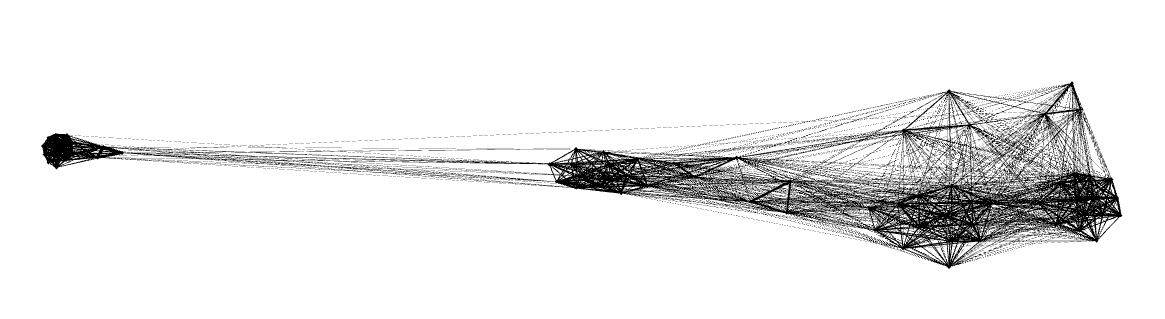


Color the nodes based on the attribute `color`
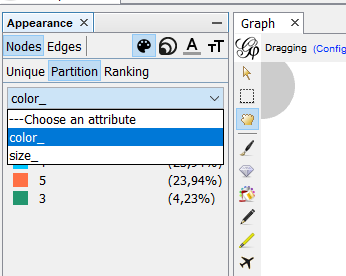

The choice of the colors is automatic by gephi, so they will not match our code of green = positive and red = negative
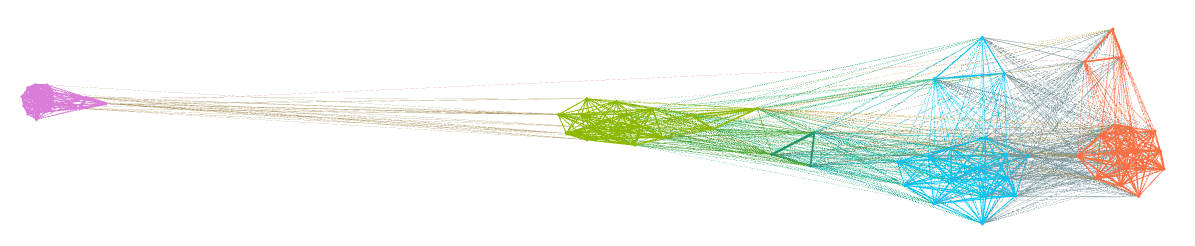

However, you can manually remap them to match the same colors. Also, you can increase the size of the nodes to make them more visible (here size 30)
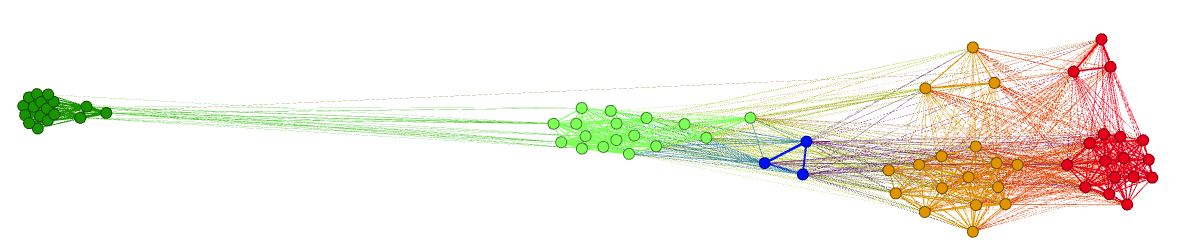

Eventually, you can also add labels and explore in details each area:
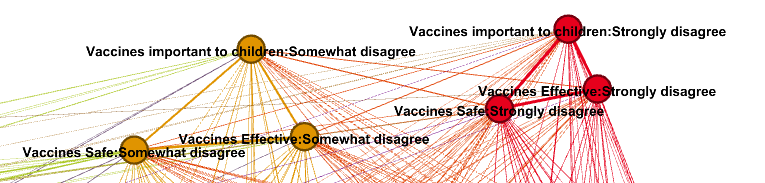

### Calculate the p-value

In [55]:
N_rep = 1000 # number of times you want to run the bootstrap to calculate the p-value
N_sub = 1000 # if you want to use subsampling

# df_t=wgm_bool.copy() # full dataset
# df_t=wgm_bool [wgm_bool["Country:"+"Ireland"]] # subsampled on a specific country
df_t=wgm_bool.iloc[np.random.rand(N_sub)*len(wgm_bool.iloc[:,0])]# subsampled on N random lines

G3 = make_graph_(list_of_nodes, spearmanr_, print_=PRINT, df=df_t)

real_corr = get_avg_corr(G3)

new_corrs = []

for i in range(0, N_rep):
    print("Iteration number = ", i)

    df = shuffle_df_for_p_exclus(df_t.copy())
    
    Gn = make_graph_(list_of_nodes, spearmanr_, print_=False, df=df)
    
    corr_new = get_avg_corr(Gn)

    new_corrs.append(corr_new)

Iteration number =  0
Iteration number =  1
Iteration number =  2
Iteration number =  3
Iteration number =  4
Iteration number =  5
Iteration number =  6
Iteration number =  7
Iteration number =  8
Iteration number =  9
Iteration number =  10
Iteration number =  11
Iteration number =  12
Iteration number =  13
Iteration number =  14
Iteration number =  15
Iteration number =  16
Iteration number =  17
Iteration number =  18
Iteration number =  19
Iteration number =  20
Iteration number =  21
Iteration number =  22
Iteration number =  23
Iteration number =  24
Iteration number =  25
Iteration number =  26
Iteration number =  27
Iteration number =  28
Iteration number =  29
Iteration number =  30
Iteration number =  31
Iteration number =  32
Iteration number =  33
Iteration number =  34
Iteration number =  35
Iteration number =  36
Iteration number =  37
Iteration number =  38
Iteration number =  39
Iteration number =  40
Iteration number =  41
Iteration number =  42
Iteration number =  4

Iteration number =  346
Iteration number =  347
Iteration number =  348
Iteration number =  349
Iteration number =  350
Iteration number =  351
Iteration number =  352
Iteration number =  353
Iteration number =  354
Iteration number =  355
Iteration number =  356
Iteration number =  357
Iteration number =  358
Iteration number =  359
Iteration number =  360
Iteration number =  361
Iteration number =  362
Iteration number =  363
Iteration number =  364
Iteration number =  365
Iteration number =  366
Iteration number =  367
Iteration number =  368
Iteration number =  369
Iteration number =  370
Iteration number =  371
Iteration number =  372
Iteration number =  373
Iteration number =  374
Iteration number =  375
Iteration number =  376
Iteration number =  377
Iteration number =  378
Iteration number =  379
Iteration number =  380
Iteration number =  381
Iteration number =  382
Iteration number =  383
Iteration number =  384
Iteration number =  385
Iteration number =  386
Iteration number

Iteration number =  688
Iteration number =  689
Iteration number =  690
Iteration number =  691
Iteration number =  692
Iteration number =  693
Iteration number =  694
Iteration number =  695
Iteration number =  696
Iteration number =  697
Iteration number =  698
Iteration number =  699
Iteration number =  700
Iteration number =  701
Iteration number =  702
Iteration number =  703
Iteration number =  704
Iteration number =  705
Iteration number =  706
Iteration number =  707
Iteration number =  708
Iteration number =  709
Iteration number =  710
Iteration number =  711
Iteration number =  712
Iteration number =  713
Iteration number =  714
Iteration number =  715
Iteration number =  716
Iteration number =  717
Iteration number =  718
Iteration number =  719
Iteration number =  720
Iteration number =  721
Iteration number =  722
Iteration number =  723
Iteration number =  724
Iteration number =  725
Iteration number =  726
Iteration number =  727
Iteration number =  728
Iteration number

Analyze the results and print if it is significant or not

In [57]:
new_corrs = np.array(new_corrs)

z_score = np.abs(real_corr-np.mean(new_corrs))/np.std(new_corrs)

print("Real corr = ", real_corr*len(G.edges))
print()

print("Max of the simulated = ", np.max(new_corrs)*len(G.edges))
print()

print("Estimated correlation")
print("mean = ", np.mean(new_corrs))
print("std = ", np.std(new_corrs))
print()

print("Significance")
print("std differences = ",z_score)

p_value = stt.norm.cdf(1-z_score)
print("p value = ",p_value)

print()
if p_value<0.01:
    print("IT IS SIGNIFICANT! :)")
else:
    print("IT IS NOT SIGNIFICANT :(")

Real corr =  108.38936524570072

Max of the simulated =  30.277789967774265

Estimated correlation
mean =  0.01189108827881595
std =  0.00024435977365493665

Significance
std differences =  138.4169404490521
p value =  0.0

IT IS SIGNIFICANT! :)


# Make figure 1b

### Make the second graph

Notice: this new graph includes also negative edges, so we need to recalculate `G` including the negative ones (we'll call this `G2`, while the aggregated network will be `GG`)
    

In [58]:
ans_dic = {"Strongly agree":1,"Somewhat agree":2,"Neither agree nor disagree":3,
             "Somewhat disagree":4,"Strongly disagree":5}

G2 = make_graph_(list_of_nodes, spearmanr_, print_=PRINT, df=df) # Calculate G2 (including negative edges)

# make the network
GG = nx.Graph()
for ans in ans_dic:
    GG.add_node(ans)

for node1 in G2.nodes:
    ans1 = node1.split(sep=':')[1]
    for node2 in G2.nodes:
        ans2 = node2.split(sep=':')[1]
        
        if (ans1 in ans_dic) and (ans2 in ans_dic):

            if GG.get_edge_data(ans1,ans2) == None: # if the edge doesn't exist yet
                GG.add_weighted_edges_from([(ans1,ans2,0)])

            if (not ans1 == ans2) and (not node1 == node2): # only if they belong to two different nodes and levels
                weight0 = G2.get_edge_data(node1,node2)
                if weight0 == None:
                    weight0 = 0
                else:
                    weight0 = weight0['weight']

                weight_base = GG.get_edge_data(ans1,ans2)['weight']

                w = weight_base+weight0/9

                GG.add_weighted_edges_from([(ans1,ans2,w)])

    #     if ans in ans_dic:
    #         posit = ans_dic[ans]
    #         distrib[posit-1] += np.sum(df[node])

In [59]:
# Add positivity as edge attribute

attributes = dict()
for edge in GG.edges:
    si_ = GG.get_edge_data(edge[0],edge[1])['weight']
    si_ = np.sign(si_)
    attributes[edge] = {"pos_":int(si_+2)}
    
nx.set_edge_attributes(GG, attributes)

In [61]:
# Save
filename = 'raw_fig_1b'
# nx.write_gexf(GG,'C:/Users/DeenoZord/Documents/All_Files_Laptop/Coding/Pyton_files/work_vaccines_limerick/Wellcome_trust/Data_analysis/nature_full_results/gephi/'+filename+'.gexf')
# nx.write_gexf(GG,'C:/where/you/want/to/save/it/'+filename+'.gexf')



To make the figure, open it in gephi but <font color='red'>do not use force atlas (or force atlas 2)</font>. Indeed, it deals very badly with negative edges. When you open it it will look like this:
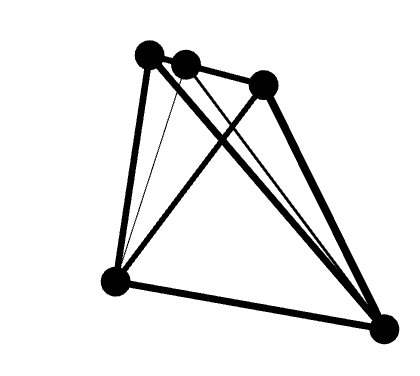

Use the edge attributes to color the edges based on their positivity. Here the value 1 would be the negative edges and value 3 would identify the positive ones.
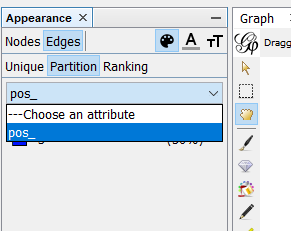

Use the labels of each node to understand which one is which. Then you can manually recolor the nodes and position them in the way you prefer:
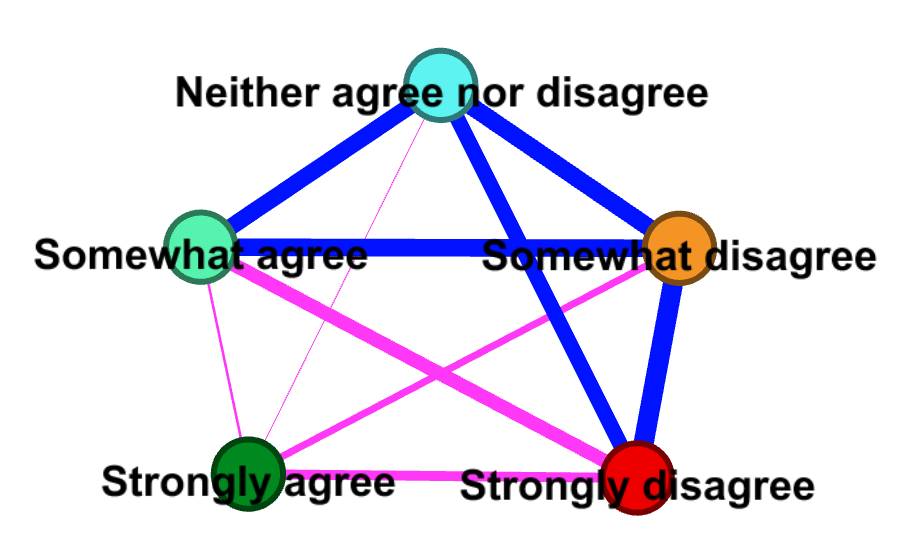

### Additional visualization

If you want to remove the negative edges, you can re-run the previous analysis on G instead of G2 or directly, go to the "data laboratory" tab in gephi and remove the negative edges.
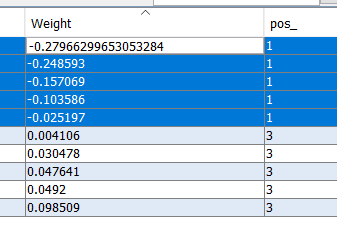

If you re-run the force atlas 2 now you'll find:
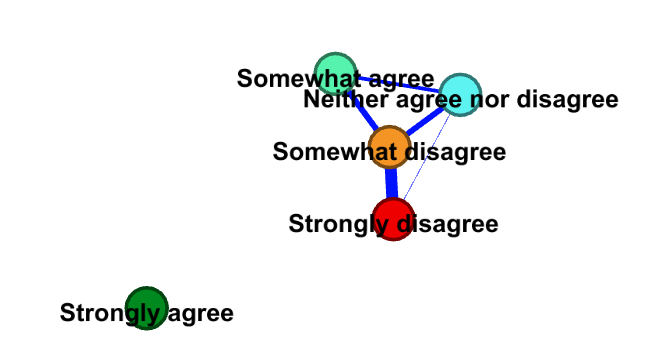

# Fig 1c

Here we calculate the hierarchical clustering

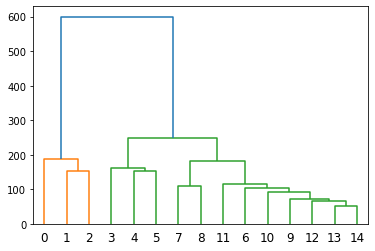

In [62]:
# Make the dendogram
df_t = wgm_bool[vacc_att_full]
arr_bool = np.array(df_t).astype(float)
arr_bool = invert_2d_array(arr_bool)

# pdist and sch are from the scipy package
y = pdist(arr_bool) # 
dendogram = sch.dendrogram(sch.linkage(y, method="ward"))

In [63]:
# Print the legend
for i in range(0, len(vacc_att_full)):
    print(i, ' = ', vacc_att_full[i])

0  =  Vaccines important to children:Strongly agree
1  =  Vaccines Safe:Strongly agree
2  =  Vaccines Effective:Strongly agree
3  =  Vaccines important to children:Somewhat agree
4  =  Vaccines Safe:Somewhat agree
5  =  Vaccines Effective:Somewhat agree
6  =  Vaccines important to children:Neither agree nor disagree
7  =  Vaccines Safe:Neither agree nor disagree
8  =  Vaccines Effective:Neither agree nor disagree
9  =  Vaccines important to children:Somewhat disagree
10  =  Vaccines Effective:Somewhat disagree
11  =  Vaccines Safe:Somewhat disagree
12  =  Vaccines Safe:Strongly disagree
13  =  Vaccines important to children:Strongly disagree
14  =  Vaccines Effective:Strongly disagree


Thus we have: (dendogram + legend)
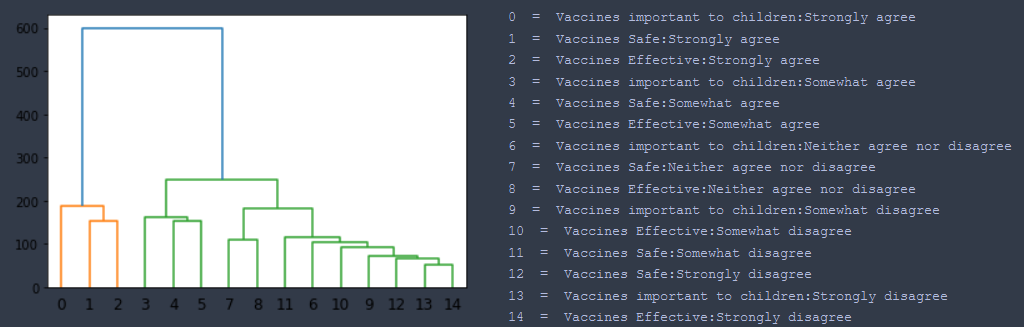

# Fig 1d

Calculate the conditional probability. This is simply done by checking all the people that have at least one attitude X and then the subgroup that has also an attitude Y. Then you divide the number of people who have both an X and a Y by the number of people that have X.

This will tell you the probability that a person that has X has also Y.

In [64]:
# The first line isolates all the people with at least 1 strongly positive attitude
# The second checks 
[M, df_t2] = atleast(wgm_bool, 1, vacc_Spos_att)
[M3, df_t3] = atleast(df_t2, 1, vacc_neut_att)
Spos_neut = np.sum(M3)/np.sum(M) # this is the conditional probability

# Repeat the same process for every level (e.g. weakly positive)
[M, df_t2] = atleast(wgm_bool, 1, vacc_Wpos_att)
[M3, df_t3] = atleast(df_t2, 1, vacc_neut_att)
Wpos_neut = np.sum(M3)/np.sum(M)

[M, df_t2] = atleast(wgm_bool, 1, vacc_neut_att)
[M3, df_t3] = atleast(df_t2, 1, vacc_neut_att)
neut_neut = np.sum(M3)/np.sum(M)

[M, df_t2] = atleast(wgm_bool, 1, vacc_Wneg_att)
[M3, df_t3] = atleast(df_t2, 1, vacc_neut_att)
Wneg_neut = np.sum(M3)/np.sum(M)

[M, df_t2] = atleast(wgm_bool, 1, vacc_Sneg_att)
[M3, df_t3] = atleast(df_t2, 1, vacc_neut_att)
Sneg_neut = np.sum(M3)/np.sum(M)

# Create two vectors with all the conditional probabilities
cond_prb1 = [Spos_neut, Wpos_neut, neut_neut, Wneg_neut, Sneg_neut]
cond_prb2 = [Spos_neut, Wpos_neut, Wneg_neut, Sneg_neut]

Plot the bar graph (excluding the neutrals)

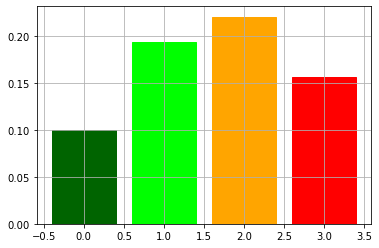

In [65]:
barlist=plt.bar(range(0,len(cond_prb2)), cond_prb2)
barlist[0].set_color('darkgreen')
barlist[1].set_color('lime')
barlist[2].set_color('orange')
barlist[3].set_color('red')
plt.grid()

Plot the samebar graph including also the neutrals. Of course, the probability that a person with a neutral attitude has at least a neutral attitude is trivially 100%

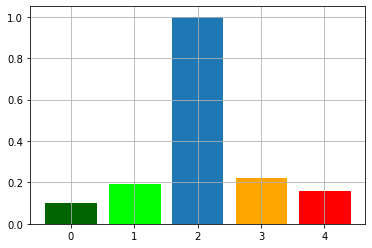

In [66]:
barlist=plt.bar(range(0,len(cond_prb1)), cond_prb1)
barlist[0].set_color('darkgreen')
barlist[1].set_color('lime')
barlist[3].set_color('orange')
barlist[4].set_color('red')
plt.grid()